# Generate Cubic Smooth Spline for approximation

Aim: To use the given data and generate a continuous clamped cubic spline

In [1]:
'''
Data in form of 3 separate set of lists
'''

x1 = [1,2,5,6,7,8,10,13,17]
y1 = [3.0,3.7,3.9,4.2,5.7,6.6, 7.1, 6.7, 4.5]

x2 = [17, 20, 23, 24, 25, 27, 27.7]
y2 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]

x3 = [27.7, 28, 29, 30]
y3 = [4.1 , 4.3, 4.1, 3.0]

# Spline Functions

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

def Splines(X, Y):
#     X,Y = zip(*data)
    np1=len(X)
    n=np1-1
    X = [float(x) for x in X]
    Y = [float(y) for y in Y]
    a = Y[:]
    b = [0.0]*(n)
    d = [0.0]*(n)
    h = [X[i+1]-X[i] for i in range(n)]
    alpha = [0.0]*n
    for i in range(1,n):
        alpha[i] = 3/h[i]*(a[i+1]-a[i]) - 3/h[i-1]*(a[i]-a[i-1])
    c = [0.0]*np1
    L = [0.0]*np1
    u = [0.0]*np1
    z = [0.0]*np1
    L[0] = 1.0
    u[0] = 0.0
    z[0] = 0.0
    for i in range(1,n):
        L[i] = 2*(X[i+1]-X[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/L[i]
        z[i] = (alpha[i]-h[i-1]*z[i-1])/L[i]
    L[n] = 1.0; z[n] = c[n] = 0.0
    for j in range(n-1, -1, -1):
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - (h[j]*(c[j+1]+2*c[j]))/3
        d[j] = (c[j+1]-c[j])/(3*h[j])
    splines = []
    for i in range(n):
        splines.append((a[i],b[i],c[i],d[i],X[i]))
    return splines,X[n]

Populating the interactive namespace from numpy and matplotlib


# Get Continuous points and plot the spline

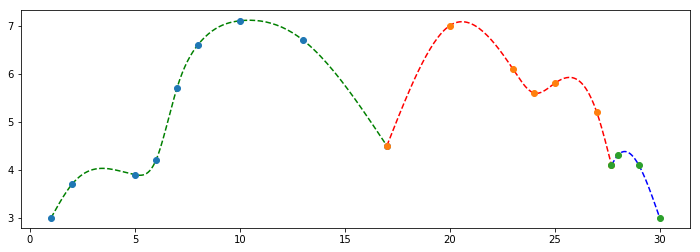

In [7]:
def splinesToPlot(splines,xn,res = 200):
    n=len(splines)
    perSpline = int(res/n)
    if perSpline < 3: perSpline = 3
    X=[]
    Y=[]
    for i in range(n-1):
        S = splines[i]
        x0 = S[4]
        x1 = splines[i+1][4]
        x = np.linspace(x0,x1,perSpline)
        for xi in x:
            X.append(xi)
            h=(xi-S[4])
            Y.append(S[0]+S[1]*h + S[2]*h**2 + S[3]*h**3)
    S=splines[n-1]
    x=np.linspace(S[4],xn,perSpline)
    for xi in x:
        X.append(xi)
        h=(xi-S[4])
        Y.append(S[0]+S[1]*h + S[2]*h**2 + S[3]*h**3)
    
    return X,Y

splines1, xn1 = Splines(x1, y1)
splines2, xn2 = Splines(x2, y2)
splines3, xn3 = Splines(x3, y3)

X1,Y1 = splinesToPlot(splines1, xn1)
X2,Y2 = splinesToPlot(splines2, xn2)
X3,Y3 = splinesToPlot(splines3, xn3)


# plotting the results
pylab.rcParams['figure.figsize'] = (12, 4)

# plt.ion()
plt.plot(X1,Y1,'g--')
plt.plot(x1,y1,'o')
plt.plot(X2,Y2,'r--')
plt.plot(x2,y2,'o')
plt.plot(X3,Y3,'b--')
plt.plot(x3,y3,'o')
plt.show()